In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import sys
import copy
import matplotlib
%matplotlib inline
sys.path.append("..")
from demo_2_awac import och_2_awac
import adept_envs
import gym
env = gym.make("franka_cabinet_slider_knob_switch_toaster_resetfree-v1")

all_paths = ['../recordings/mscsstt_may_28_part0.pkl',
            '../recordings/mscsstt_may_28_part1.pkl',
            '../recordings/mscsstt_may_28_part2.pkl',
            '../recordings/mscsstt_may_28_part3.pkl',
            '../recordings/mscsstt_may_28_part4.pkl']
             
dat = []

for p in all_paths:
    dat_curr = pickle.load(open(p, 'rb'))
    dat += dat_curr
print(len(dat))


587


In [26]:
dat[0]

[{'actions': array([-0.11720697, -0.1042503 , -0.17697427,  1.02482287, -0.11562824,
         -0.1400234 ,  0.06512468,  1.        ,  1.        ]),
  'obs': array([ 4.00016840e-002,  3.99699949e-002,  1.97125344e-168,
          1.97125344e-168,  8.24417000e-005,  9.48283000e-005,
          1.45785895e-003,  0.00000000e+000, -2.64842505e-001,
          2.38754545e-001,  2.60830000e+000,  6.53595423e-001,
         -6.53075155e-001, -2.70360276e-001, -2.70575657e-001,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
          0.00000000e+000]),
  'reward': 0.0,
  'done': True,
  'info': OrderedDict([('ob

In [2]:
list_awac = och_2_awac(dat)
print(list_awac[0]['observations'].shape)
print(env.get_obs_dict())

(135, 37)
OrderedDict([('t', 0.0), ('qp', array([0., 0.])), ('qv', array([0., 0.])), ('obj_qp', array([0., 0., 0., 0., 0., 0.])), ('mocap_pos', array([[0.  , 0.  , 2.89]])), ('mocap_quat', array([[ 0.65359542, -0.65307515, -0.27036028, -0.27057566]])), ('goal', array([ 3.99808108e-02,  4.00001853e-02, -7.00000000e-01, -7.00000000e-01,
        1.10841816e-02, -2.21499728e-28,  7.84320626e-04, -4.21652284e-02,
       -4.65863126e-02,  1.60992082e-01,  2.63149829e+00,  6.53595423e-01,
       -6.53075155e-01, -2.70360276e-01, -2.70575657e-01]))])


(135, 37)


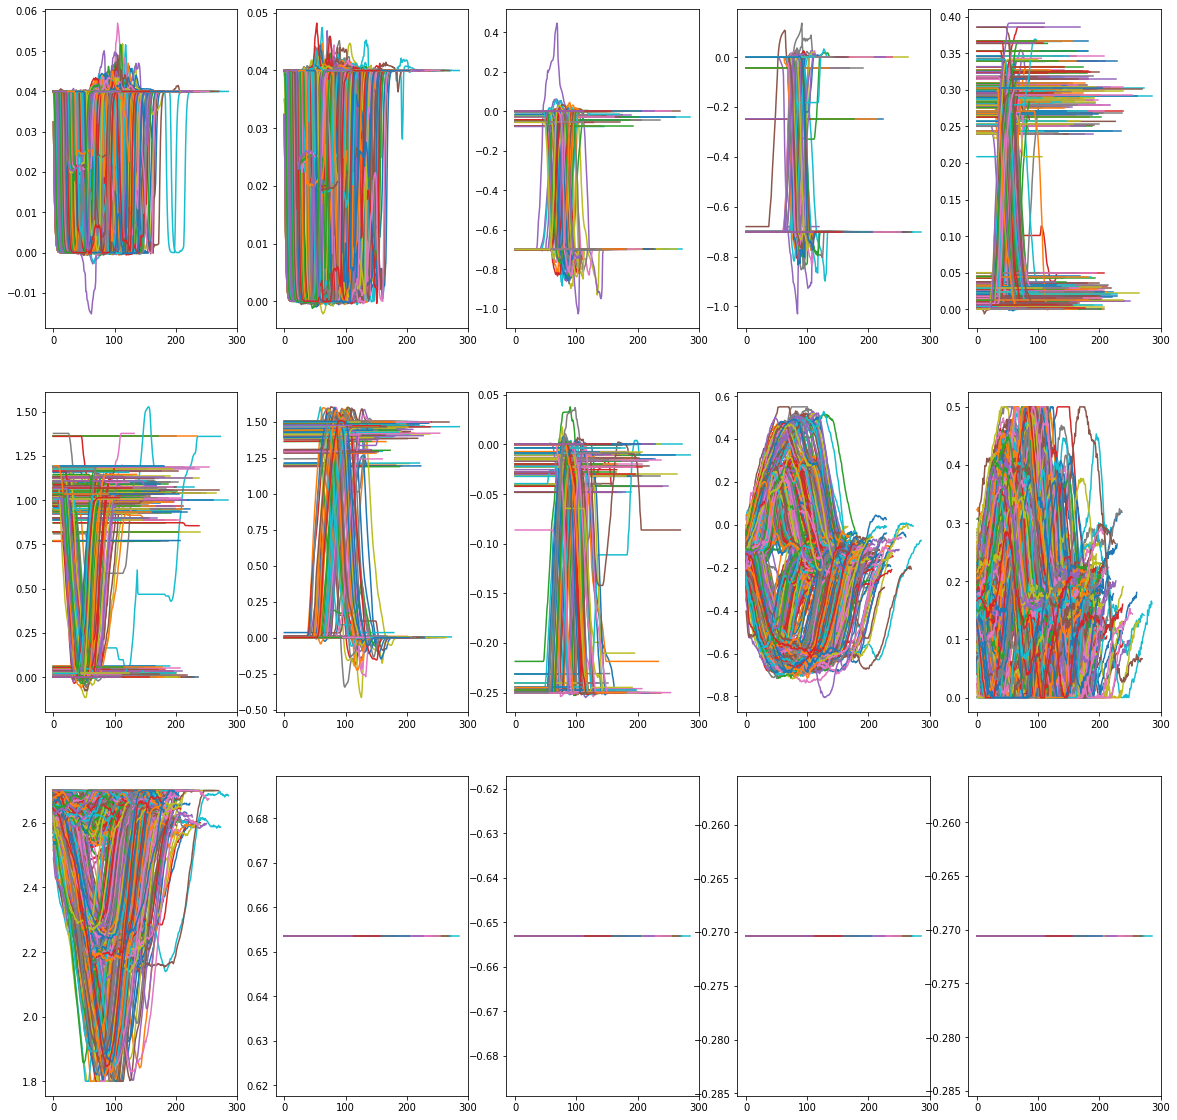

In [27]:
list_awac = och_2_awac(dat)
print(list_awac[0]['observations'].shape)
curr_x = 0
fig, ax = plt.subplots(3, 5, figsize=(20, 20))
for p in list_awac:
    for i in range(3):  
        for j in range(5):
            ax[i][j].plot(range(curr_x, curr_x + len(p['observations'])), p['observations'][:, i*5 + j])

plt.show()

In [4]:
import itertools

def check_goal_completion(curr_pos):
    max_objs = np.array([-0.2, -0.2, 0.2, 0.75, 1.1, -0.07])
    min_objs = np.array([-0.6, -0.6, 0.08, 0.1, 0.1, -0.21])
    init_bitflips = np.array([0, 0, 0, 0, 0, 0])
    curr_bitflips = init_bitflips.copy()
    if len(curr_pos.shape) > 1:
        curr_pos = curr_pos.squeeze(axis=0)
    for j in range(6):
        if curr_pos[j] > max_objs[j]:
            curr_bitflips[j] = 1
        elif curr_pos[j] < min_objs[j]:
            curr_bitflips[j] = 0
    mult = np.array([2**i for i in range(6)])[::-1]
    new_idx = np.sum(mult*curr_bitflips)
    return new_idx

s = check_goal_completion(list_awac[0]['observations'][0, 2:8])
g = check_goal_completion(list_awac[0]['observations'][-1, 2:8])
print("Start %d"%s)
print("goal %d"%g)

Start 49
goal 53


At demo 0 of 575
At demo 1 of 575
At demo 2 of 575
At demo 3 of 575
At demo 4 of 575
At demo 5 of 575
At demo 6 of 575
At demo 7 of 575
At demo 8 of 575
At demo 9 of 575
At demo 10 of 575
At demo 11 of 575
At demo 12 of 575
At demo 13 of 575
At demo 14 of 575
At demo 15 of 575
At demo 16 of 575
At demo 17 of 575
At demo 18 of 575
At demo 19 of 575
At demo 20 of 575
At demo 21 of 575
At demo 22 of 575
At demo 23 of 575
At demo 24 of 575
At demo 25 of 575
At demo 26 of 575
At demo 27 of 575
At demo 28 of 575
At demo 29 of 575
At demo 30 of 575
At demo 31 of 575
At demo 32 of 575
At demo 33 of 575
At demo 34 of 575
At demo 35 of 575
At demo 36 of 575
At demo 37 of 575
At demo 38 of 575
At demo 39 of 575
At demo 40 of 575
At demo 41 of 575
At demo 42 of 575
At demo 43 of 575
At demo 44 of 575
At demo 45 of 575
At demo 46 of 575
At demo 47 of 575
At demo 48 of 575
At demo 49 of 575
At demo 50 of 575
At demo 51 of 575
At demo 52 of 575
At demo 53 of 575
At demo 54 of 575
At demo 55 of 575
At

At demo 437 of 575
At demo 438 of 575
At demo 439 of 575
At demo 440 of 575
At demo 441 of 575
At demo 442 of 575
At demo 443 of 575
At demo 444 of 575
At demo 445 of 575
At demo 446 of 575
At demo 447 of 575
At demo 448 of 575
At demo 449 of 575
At demo 450 of 575
At demo 451 of 575
At demo 452 of 575
At demo 453 of 575
At demo 454 of 575
At demo 455 of 575
At demo 456 of 575
At demo 457 of 575
At demo 458 of 575
At demo 459 of 575
At demo 460 of 575
At demo 461 of 575
At demo 462 of 575
At demo 463 of 575
At demo 464 of 575
At demo 465 of 575
At demo 466 of 575
At demo 467 of 575
At demo 468 of 575
At demo 469 of 575
At demo 470 of 575
At demo 471 of 575
At demo 472 of 575
At demo 473 of 575
At demo 474 of 575
At demo 475 of 575
At demo 476 of 575
At demo 477 of 575
At demo 478 of 575
At demo 479 of 575
At demo 480 of 575
At demo 481 of 575
At demo 482 of 575
At demo 483 of 575
At demo 484 of 575
At demo 485 of 575
At demo 486 of 575
At demo 487 of 575
At demo 488 of 575
At demo 489 

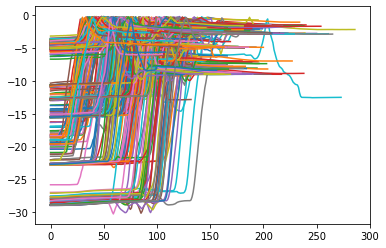

53
55
63
31
63
55
51
59
27
11
10
2
6
7
5
1
9
25
29
61
53
37
39
38
6
2
17
1
9
13
15
14
15
7
39
35
43
59
58
53
55
39
7
15
47
63
62
63
61
29
21
23
22
18
2
10
41
45
13
5
7
6
38
46
46
FOUND A BROKEN DEMO
47
43
41
45
37
53
61
63
31
23
22
30
14
46
47
45
37
53
49
51
55
39
7
6
14
15
7
3
11
43
42
34
50
54
55
53
55
54
22
30
26
10
58
50
51
59
27
19
17
21
29
61
53
55
54
22
18
26
10
14
15
7
5
37
45
61
57
59
58
50
18
22
23
21
5
13
45
41
43
42
46
62
58
26
27
25
57
61
53
21
29
31
30
22
54
55
63
47
43
41
43
47
63
55
23
22
30
14
10
11
51
55
63
31
23
22
23
31
29
31
27
25
29
21
53
61
63
62
54
22
23
7
3
11
9
41
45
37
53
55
54
62
30
14
30
31
23
19
27
25
29
61
53
55
54
62
30
22
23
19
17
25
27
17
25
57
61
63
62
17
25
29
13
15
47
39
55
54
62
30
22
23
21
53
61
57
59
58
62
54
55
23
7
3
2
10
42
10
11
10
2
18
22
54
55
63
31
23
22
23
21
29
31
29
61
57
41
33
35
39
55
63
62
58
26
18
55
63
31
27
26
10
2
6
7
15
13
45
37
53
55
53
61
29
21
23
19
27
26
18
50
54
50
51
35
3
35
39
37
45
47
46
14
30
22
54
55
51
50
58
59
57
25


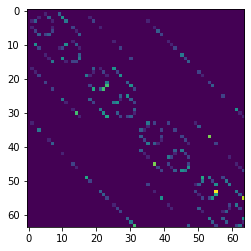

In [5]:
idx_completion = False
def end_relabel(env, path):
    o_size = 15
    path['observations'] = path['observations'][:, :o_size]
    path['next_observations'] = path['next_observations'][:, :o_size]
    
#     path['observations'][:, o_size:] = path['observations'][-1, :o_size].copy()
#     path['next_observations'][:, o_size:] = path['observations'][-1, :o_size]
    
    goal_idx = check_goal_completion(path['observations'][-1, 2:8])
    concat_val = np.zeros((path['observations'].shape[0], 64))
    concat_val[:, goal_idx] = 1.
    path['observations'] = np.concatenate([path['observations'], concat_val.copy()], axis=-1)
    path['next_observations'] = np.concatenate([path['next_observations'], concat_val.copy()], axis=-1)
    
    env.env._goal_idx = check_goal_completion(path['observations'][-1, 2:8])
    env.env._current_idx = check_goal_completion(path['observations'][0, 2:8])
    env.env.goal = concat_val.copy()  #path['observations'][-1, :o_size].copy()
    env.env._idx_completion = idx_completion
    path['rewards'] = np.zeros_like(path['rewards'])

    for idx in range(len(path['observations'])):
        env.env.sim.data.mocap_pos[:] = path['observations'][idx][8:11].copy()
        env.env.sim.data.mocap_quat[:] = path['observations'][idx][11:15].copy()
        env.env.sim.data.qpos[9:15] = path['observations'][idx][2:8].copy()
        for _ in range(10):
            env.env.sim.forward()
            env.env.sim.step()
#         env.env.render()
#         for i in range(3):  
#             for j in range(5):
#                 ax[i][j].plot(range(curr_x, curr_x + len(p['observations'])), p['observations'][:, i*5 + j])
        reward_dict = env.env.get_reward_dict(None, {'mocap_pos': path['observations'][idx:idx+1, 8:11],
                                                     'obj_qp': path['observations'][idx:idx+1, 2:8]})
        path['rewards'][idx] = np.sum([v for k, v in reward_dict.items()])
    return path


list_awac = och_2_awac(dat)
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt 
curr_x = 0  
label_list = itertools.product(['Sw1C', 'Sw1O'], 
                               ['Sw2C', 'Sw2O'], 
                               ['SC', 'SO'], 
                               ['CC', 'CO'], 
                               ['ToC', 'ToO'], 
                               ['TrC', 'TrO'])
tasks = ['-'.join(s) for s in label_list]
# tasks = ['CC', 'CO', 'OC', 'OO']
task_list = []
adjacency_matrix = np.zeros((64, 64))
labeled_goals = [[] for _ in range(64)]
counts_starts = np.zeros(64)
counts_goals = np.zeros(64)
end_states = [None for _ in range(64)]
path_lists = [[[] for _ in range(64)] for _ in range(64)]
filtered_paths = []
for i, path in enumerate(list_awac):
    start_idx = check_goal_completion(path['observations'][0, 2:8])
    end_idx = check_goal_completion(path['observations'][-1, 2:8])
    if start_idx == end_idx:
        print("FOUND A BROKEN DEMO")
        continue
    print("At demo %d of %d"%(i, len(list_awac)))
    end_relabel(env, path)
    plt.plot(path['rewards'])
    filtered_paths.append(path)
plt.show()
    
for p in list_awac:
    curr_x += len(p['observations'])
    start_idx = check_goal_completion(p['observations'][0, 2:8])
    start = tasks[start_idx]
    end_idx = check_goal_completion(p['observations'][-1, 2:8])
    print(end_idx)
    if start_idx == end_idx:
        print("FOUND A BROKEN DEMO")
        continue
    end = tasks[end_idx]
    adjacency_matrix[start_idx, end_idx] += 1
    path_lists[start_idx][end_idx].append(copy.deepcopy(p))
    task_list.append(check_goal_completion(p['observations'][-1, 2:8]))
    labeled_goals[end_idx].append(p['observations'][-1])
    counts_goals[end_idx] += 1
    counts_starts[start_idx] += 1
    if end_states[end_idx] is None:
        ei_val = np.zeros(64)
        ei_val[end_idx] = 1.
        end_states[end_idx] = ei_val.copy() #p['observations'][-1, :15]
plt.show() 

plt.imshow(adjacency_matrix)
plt.show()

In [59]:
len_matrix = np.zeros((64, 64))
for i in range(64):
    for j in range(64):
        len_matrix[i][j] = len(path_lists[i][j])
len_matrix[53][55] = 0.
len_matrix[55][63] = 0.
len_matrix[37][53] = 0.
idx = np.argmax(len_matrix)
print(idx //64)
print(idx % 64)
print(len_matrix[45][37])

45
37
8.0


In [20]:
pickle.dump(end_states, open("end_states_6elements_onehot.pkl", "wb"))

In [25]:
goal_matrix = np.zeros((64, 64))
for i in range(64):
    for j in range(64):
        if adjacency_matrix[i, j] > 0:
            goal_matrix[i, j] = 1

pickle.dump(goal_matrix, open("goal_matrix_6elements_onehot.pkl", "wb"))

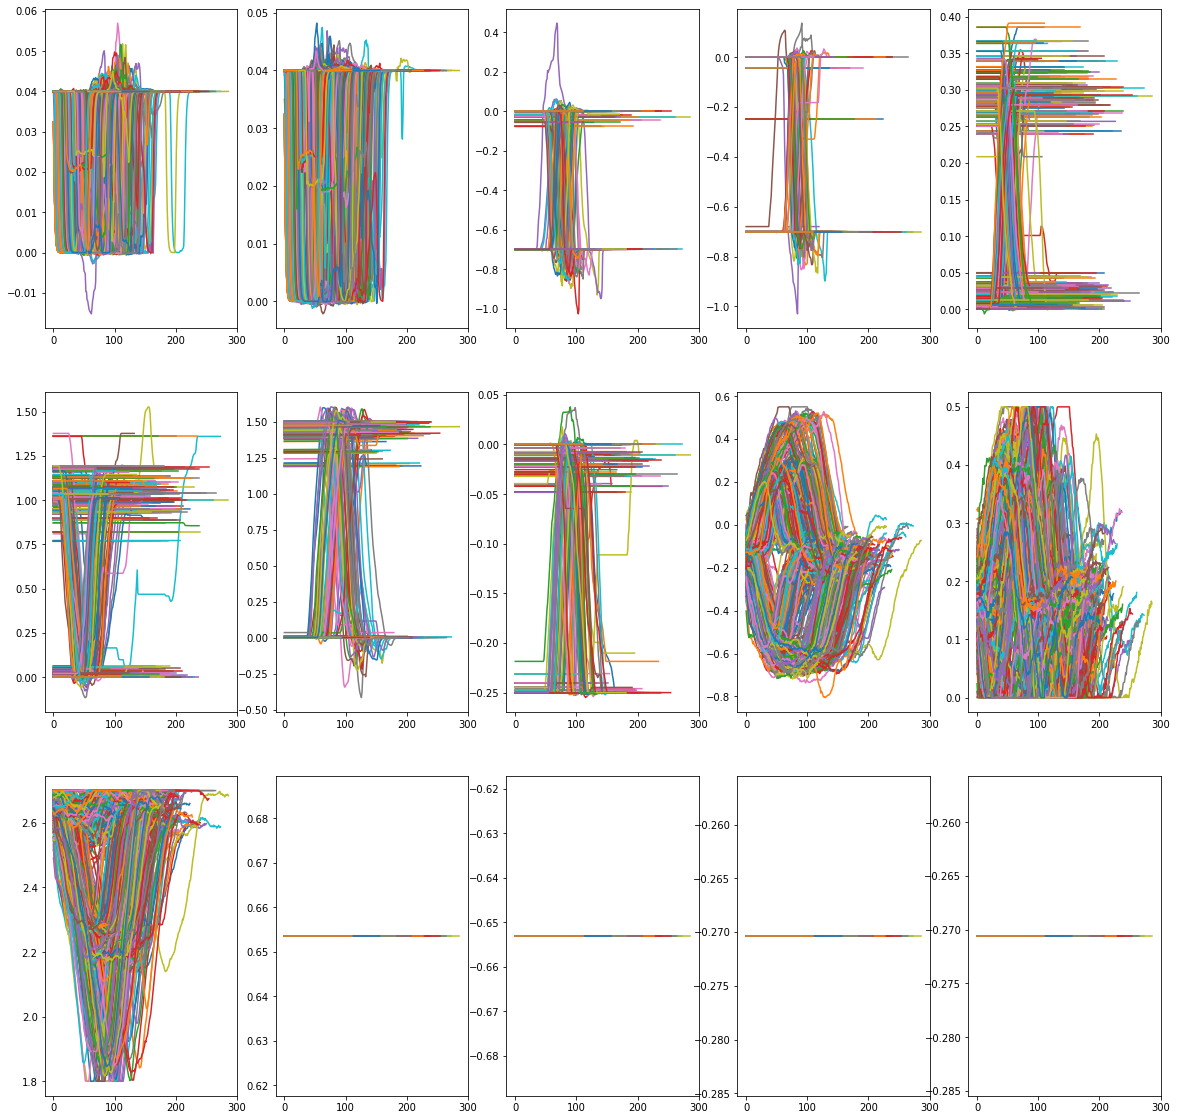

In [22]:
curr_x = 0
fig, ax = plt.subplots(3, 5, figsize=(20, 20))
for p in filtered_paths:
    for i in range(3):  
        for j in range(5):
            ax[i][j].plot(range(curr_x, curr_x + len(p['observations'])), p['observations'][:, i*5 + j])

plt.show()

In [23]:
pickle.dump(filtered_paths, open('demo_list_sim_6elements_dense_onehot.pkl', 'wb'))

In [24]:
c = 0
for e in end_states:
    if e is not None:
        c+= 1
print(c)

48


In [60]:
pickle.dump(path_lists[45][37], open('4537_traj.pkl', 'wb'))